In [22]:
import numpy as np
from matplotlib import pyplot as plt
from TOF import VENUS_chopper


In [23]:
Pulse_frequency=60.
pulse_width=0
delay=0
sourceTodetector=25.
chopper_rotational_frequency=60.
wavelength_center=2

param=(Pulse_frequency,pulse_width,delay,sourceTodetector,chopper_rotational_frequency, wavelength_center)

In [24]:

tmin=0

chp1=VENUS_chopper(*param)

Frame_MAXtime=chp1.min_max_tof('max_tof')
Frame_MINtime=chp1.min_max_tof('min_tof')

def chpper_openat(chopper_distance):
    return ((Frame_MINtime*chopper_distance)/sourceTodetector)

def chpper_closeAt(chopper_distance):
    return (chpper_openat(chopper_distance)+chp1.Chopper_open_duration(chopper_distance))


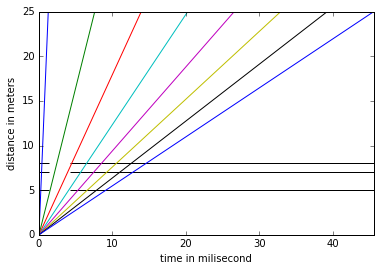

In [25]:
distance=np.arange(0,25,0.1)
wavelength=np.arange(0.2,8,1)
chopper_distance=np.array([5, 7, 8])

plt.figure()
[plt.plot(chp1.tof(distance,i), distance) for i in wavelength]
[plt.hlines(chopper_distance, tmin, chpper_openat(i), colors='k', linestyles='solid') for i in chopper_distance]
[plt.hlines(chopper_distance, chpper_closeAt(i), chp1.tof(sourceTodetector,wavelength[-1]), colors='k', linestyles='solid') for i in chopper_distance]
plt.xlabel('time in milisecond')
plt.ylabel('distance in meters')
plt.xlim(0,chp1.tof(sourceTodetector,wavelength[-1]))
plt.show()